In [14]:
from google.colab import files


In [15]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv
User uploaded file "Google_Stock_Price_Train (1).csv" with length 63488 bytes


In [16]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [18]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [19]:

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [20]:

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [22]:

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
38/38 [==============================] - 24s 248ms/step - loss: 0.0475
Epoch 2/10
38/38 [==============================] - 6s 165ms/step - loss: 0.0073
Epoch 3/10
38/38 [==============================] - 5s 140ms/step - loss: 0.0058
Epoch 4/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0052
Epoch 5/10
38/38 [==============================] - 4s 108ms/step - loss: 0.0046
Epoch 6/10
38/38 [==============================] - 5s 141ms/step - loss: 0.0046
Epoch 7/10
38/38 [==============================] - 4s 109ms/step - loss: 0.0044
Epoch 8/10
38/38 [==============================] - 4s 110ms/step - loss: 0.0045
Epoch 9/10
38/38 [==============================] - 5s 142ms/step - loss: 0.0041
Epoch 10/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0044


1/1 [==============================] - 2s 2s/step


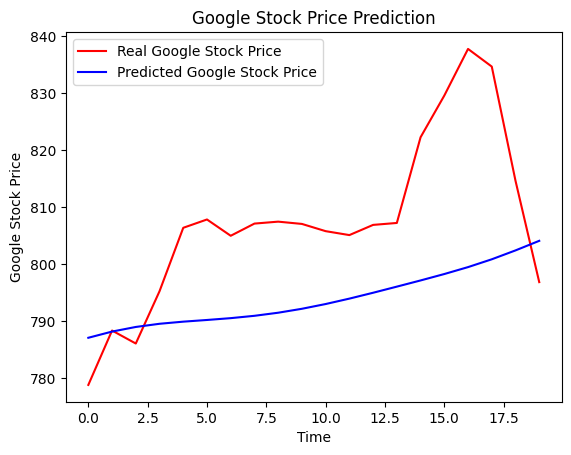

In [24]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [25]:
predicted_stock_price

array([[787.08887],
       [788.17773],
       [788.98816],
       [789.546  ],
       [789.91864],
       [790.21484],
       [790.5357 ],
       [790.9459 ],
       [791.4882 ],
       [792.1794 ],
       [793.0136 ],
       [793.9646 ],
       [794.9945 ],
       [796.0687 ],
       [797.1559 ],
       [798.2818 ],
       [799.4975 ],
       [800.8696 ],
       [802.4307 ],
       [804.11194]], dtype=float32)

NameError: name 'df' is not defined